# **ATP match prediction**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

### Data exploration and cleaning

In [3]:
#Loading dataframe
data = pd.read_csv("/kaggle/input/atpdata/ATP.csv")

In [4]:
#Checking types and main informations
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169690 entries, 0 to 169689
Data columns (total 49 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   best_of             169690 non-null  int64  
 1   draw_size           1232 non-null    float64
 2   l_1stIn             83415 non-null   float64
 3   l_1stWon            83415 non-null   float64
 4   l_2ndWon            83415 non-null   float64
 5   l_SvGms             83415 non-null   float64
 6   l_ace               83415 non-null   float64
 7   l_bpFaced           83415 non-null   float64
 8   l_bpSaved           83415 non-null   float64
 9   l_df                83415 non-null   float64
 10  l_svpt              83415 non-null   float64
 11  loser_age           164700 non-null  float64
 12  loser_entry         25339 non-null   object 
 13  loser_hand          169605 non-null  object 
 14  loser_ht            139052 non-null  float64
 15  loser_id            169690 non-nul

In [5]:
#features names
data.columns

Index(['best_of', 'draw_size', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms',
       'l_ace', 'l_bpFaced', 'l_bpSaved', 'l_df', 'l_svpt', 'loser_age',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_id', 'loser_ioc',
       'loser_name', 'loser_rank', 'loser_rank_points', 'loser_seed',
       'match_num', 'minutes', 'round', 'score', 'surface', 'tourney_date',
       'tourney_id', 'tourney_level', 'tourney_name', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_ace', 'w_bpFaced', 'w_bpSaved', 'w_df',
       'w_svpt', 'winner_age', 'winner_entry', 'winner_hand', 'winner_ht',
       'winner_id', 'winner_ioc', 'winner_name', 'winner_rank',
       'winner_rank_points', 'winner_seed'],
      dtype='object')

In [6]:
data.head()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,...,winner_age,winner_entry,winner_hand,winner_ht,winner_id,winner_ioc,winner_name,winner_rank,winner_rank_points,winner_seed
0,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,R,NaN,110023,AUS,Richard Coulthard,NaN,NaN,NaN
1,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.520876,NaN,R,NaN,109803,AUS,John Brown,NaN,NaN,NaN
2,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.216290,NaN,R,NaN,100257,AUS,Ross Case,NaN,NaN,NaN
3,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.264203,NaN,R,NaN,100105,AUS,Allan Stone,NaN,NaN,5.0
4,5,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.861739,NaN,R,NaN,109966,AUS,Warren Jacques,NaN,NaN,NaN


Checking whether a variable is numeric or categorial

In [7]:
data.nunique()

best_of                   2
draw_size                 7
l_1stIn                 172
l_1stWon                133
l_2ndWon                 64
l_SvGms                  44
l_ace                    59
l_bpFaced                36
l_bpSaved                29
l_df                     25
l_svpt                  249
loser_age              3449
loser_entry               7
loser_hand                3
loser_ht                 24
loser_id               5769
loser_ioc               136
loser_name             5745
loser_rank             1415
loser_rank_points      3777
loser_seed               35
match_num               370
minutes                 321
round                     9
score                 21049
surface                   5
tourney_date           2849
tourney_id             7374
tourney_level             5
tourney_name           3695
w_1stIn                 163
w_1stWon                129
w_2ndWon                 63
w_SvGms                  43
w_ace                    57
w_bpFaced           

The winner/loser hand should be either right or left. Howver we see that there are 3 possible values.

In [8]:
data['winner_hand'].unique()

array(['R', 'L', 'U', nan], dtype=object)

In [9]:
data['loser_hand'].unique()

array(['R', 'L', 'U', nan], dtype=object)

From the above, it seems that the letter U designates unknown. Therefore it should be replaced by nan

In [10]:
data['winner_hand']=data['winner_hand'].replace('U', np.nan)
data['loser_hand']=data['loser_hand'].replace('U', np.nan)

In [11]:
#Checking if the operation went well
data['winner_hand'].unique()

array(['R', 'L', nan], dtype=object)

In [12]:
data['loser_hand'].unique()

array(['R', 'L', nan], dtype=object)

In [13]:
data['surface'].unique()

array(['Grass', 'Hard', 'Clay', 'Carpet', nan, 'None'], dtype=object)

We remark here that there are some none values in surface that should be handeled by converting the to nan

In [14]:
data['surface']=data['surface'].replace('None', np.nan)

In [15]:
#Checkinf if everything went well
data['surface'].unique()

array(['Grass', 'Hard', 'Clay', 'Carpet', nan], dtype=object)

In [16]:
# percentage of available data per feature
nbdata=len(data)
print(nbdata)
print((1-(data.isnull().sum())/nbdata)*100)

169690
best_of               100.000000
draw_size               0.726030
l_1stIn                49.157287
l_1stWon               49.157287
l_2ndWon               49.157287
l_SvGms                49.157287
l_ace                  49.157287
l_bpFaced              49.157287
l_bpSaved              49.157287
l_df                   49.157287
l_svpt                 49.157287
loser_age              97.059344
loser_entry            14.932524
loser_hand             97.518416
loser_ht               81.944723
loser_id              100.000000
loser_ioc             100.000000
loser_name            100.000000
loser_rank             85.985621
loser_rank_points      54.820555
loser_seed             19.360599
match_num             100.000000
minutes                48.384112
round                 100.000000
score                  99.896281
surface                98.456597
tourney_date          100.000000
tourney_id            100.000000
tourney_level         100.000000
tourney_name          100.000000
w_1

In [17]:
#Extracting the year from the tournament date
data['year']=[int(str(x)[:4]) for x in data.tourney_date]
nbcol=data.shape[1]
# Checking the data availability per year
data['avail']=[(1-(data.iloc[ii].isnull().sum()*1./nbcol))*100 for ii in range(data.shape[0])]
data.groupby(['year'])['avail'].mean()

year
1968    42.917136
1969    41.572985
1970    41.923582
1971    41.962784
1972    41.974924
1973    43.180404
1974    45.917873
1975    45.956044
1976    46.545503
1977    47.066130
1978    48.035950
1979    48.246976
1980    48.559408
1981    48.375555
1982    45.198118
1983    49.059994
1984    49.230146
1985    49.502072
1986    49.460134
1987    49.496723
1988    49.474775
1989    49.371684
1990    53.617954
1991    86.060639
1992    86.949062
1993    87.264781
1994    86.916201
1995    87.114737
1996    86.922515
1997    87.180567
1998    87.588743
1999    86.975668
2000    86.590855
2001    87.698469
2002    87.063591
2003    87.028498
2004    86.870387
2005    87.556647
2006    87.507985
2007    87.483513
2008    87.191250
2009    87.320755
2010    87.267922
2011    87.436153
2012    87.480452
2013    87.127717
2014    86.867188
2015    86.197757
2016    90.734444
2017    90.268884
2018    89.920646
2019    89.710247
Name: avail, dtype: float64

We notice that the data before 1991 is poorly informed, thus it is not appropriate for use. In fact, the data availability passes from 53% as maximum between in 1968 an 1990 to 86% as a minimum from 1991. Therefore, in the following we decided to only keep data from 1991 and on.

In [18]:
#Data truncation
data2=data[data["year"]>1990]

### Feature selection and enginnering

In [19]:
#Checking data availability per feature after truncation
nbdata2=len(data2)
print((1-(data2.isnull().sum())/nbdata2)*100)
lfeatures=(1-(data2.isnull().sum())/nbdata2)*100

best_of               100.000000
draw_size               0.000000
l_1stIn                89.796072
l_1stWon               89.796072
l_2ndWon               89.796072
l_SvGms                89.796072
l_ace                  89.796072
l_bpFaced              89.796072
l_bpSaved              89.796072
l_df                   89.796072
l_svpt                 89.796072
loser_age              99.787777
loser_entry            19.574046
loser_hand             98.129854
loser_ht               90.590022
loser_id              100.000000
loser_ioc             100.000000
loser_name            100.000000
loser_rank             97.598759
loser_rank_points      96.606591
loser_seed             21.936506
match_num             100.000000
minutes                88.382690
round                 100.000000
score                  99.997845
surface                99.786700
tourney_date          100.000000
tourney_id            100.000000
tourney_level         100.000000
tourney_name          100.000000
w_1stIn   

Some features are not well informed in this data set such as the draw size, the winner/loser seed, the winner/loser entry... In the following, only features that have an availability rate above 80% are kept. 

**One feature that is very valuable in the prediction but poorly informed in this data, is the entry. In order to enhance the prediction, data concerning this feature probably needs to be collected.**

In [20]:
#Extracting the features names with an availability rate below 80%
lfeatures[lfeatures<80]

draw_size        0.000000
loser_entry     19.574046
loser_seed      21.936506
winner_entry    11.747660
winner_seed     40.381570
dtype: float64

In [21]:
#Checking the number of columns before drop
len(data2.columns)

51

In [22]:
data2=data2.drop(columns=['draw_size', 'loser_entry', 'loser_seed', 'winner_seed', 'winner_entry'])

In [23]:
#Checking the number of columns after drop
len(data2.columns)

46

Here we drop redundant features such as winner/loser_name that have the same information as the winner/loser_id. We also remove the features we create year and avail. 

In [24]:
data2 = data2.drop(columns=['winner_name','loser_name', 'year', 'avail'])

In [25]:
data2.columns

Index(['best_of', 'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_ace',
       'l_bpFaced', 'l_bpSaved', 'l_df', 'l_svpt', 'loser_age', 'loser_hand',
       'loser_ht', 'loser_id', 'loser_ioc', 'loser_rank', 'loser_rank_points',
       'match_num', 'minutes', 'round', 'score', 'surface', 'tourney_date',
       'tourney_id', 'tourney_level', 'tourney_name', 'w_1stIn', 'w_1stWon',
       'w_2ndWon', 'w_SvGms', 'w_ace', 'w_bpFaced', 'w_bpSaved', 'w_df',
       'w_svpt', 'winner_age', 'winner_hand', 'winner_ht', 'winner_id',
       'winner_ioc', 'winner_rank', 'winner_rank_points'],
      dtype='object')

In [26]:
extract_data=data2[['w_1stIn', 'w_1stWon','w_2ndWon', 'w_SvGms', 'w_ace', 'w_bpFaced', 'w_bpSaved',
                   'w_df','w_svpt', 'winner_rank', 'winner_rank_points',
                  'l_1stIn', 'l_1stWon','l_2ndWon', 'l_SvGms', 'l_ace', 'l_bpFaced', 'l_bpSaved',
                   'l_df','l_svpt', 'loser_rank', 'loser_rank_points']]


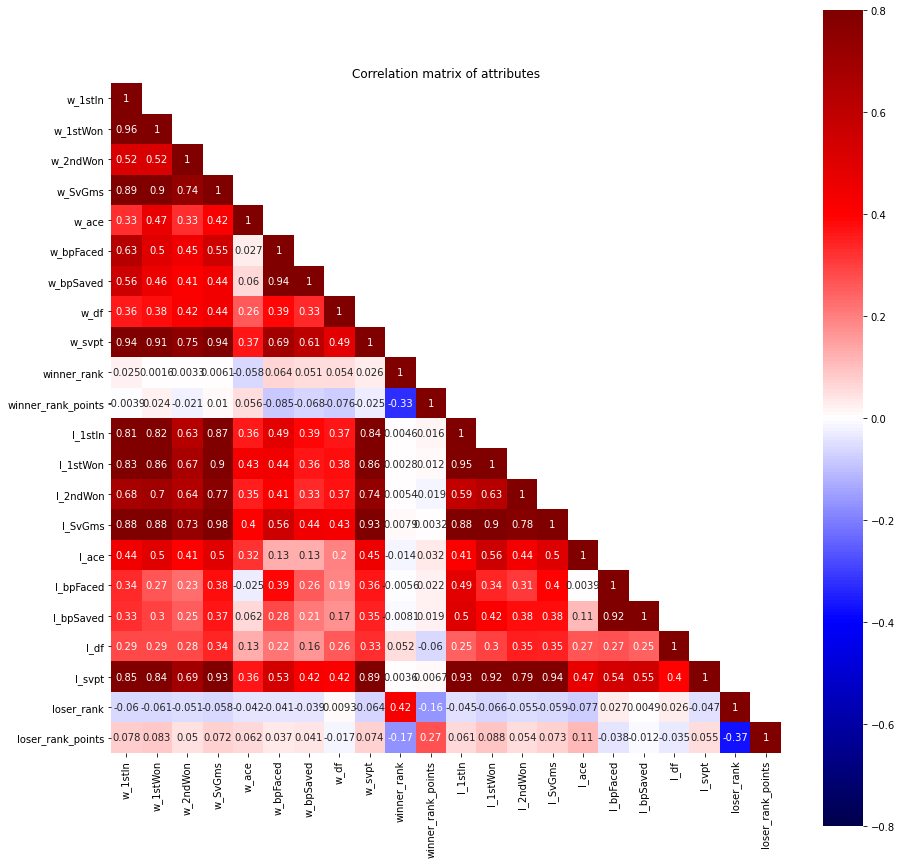

In [27]:
import seaborn as sns
mask=np.array(extract_data.corr())
mask[np.tril_indices_from(mask)]=False

#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(extract_data.corr(),mask=mask,vmin=-0.8,vmax=0.8,square=True,annot=True,ax=ax, cmap='seismic')
ax.set_title('Correlation matrix of attributes')
plt.show()

From this correlation matrix restricted to **"_1stIn", "_1stWon", "_2nd_Won", "_SvGms", "_ace","_bpFaced", "_bpSaved","_df" "_svpt"** features for both the winner and the loser, we can see that they are highly correlated to each other for the same player and to the opponent player. However, they are less correlated to the **"_rank" and "_rank points"**. In order to avoid overfitting, features that are correlated to each others should be removed. Besides, if we want to build a model that is able to predict the game output (who is going to win?) we should not take these features into account as it is impossible to know them in advance. In the same fashion, **"minutes" and "score"** are not available data before the beginning of the match. 
Therefore, we proceed by removing the features that are obviously not available before a match to predict mentionned previously and we only keep variables that can be known in advance and that have a direct impact on the performance of the player and hence on the outcome of the match. The latter are **"_age", "_hand", "_ht", "_id", "_ioc", "_name", "_rank", "_rank_points"**. We consider that the performnace history of the player is summarized by rank and rank_points. However, I find it weird that the rank_points and rank are negatively correlated. Besides, we also remove "tourney_name","tourney_date", "tourney_id" and "match_num" as they are not very significant for the prediction. 

In [28]:
#Choosing the final dataset
data3=data2[['match_num','surface','tourney_level','round',
              'loser_id', 'loser_hand','loser_ioc', 
             'loser_age', 'loser_ht',  'loser_rank','loser_rank_points',
             'winner_id', 'winner_hand','winner_ioc',
             'winner_age',  'winner_ht', 'winner_rank','winner_rank_points']]


<AxesSubplot:>

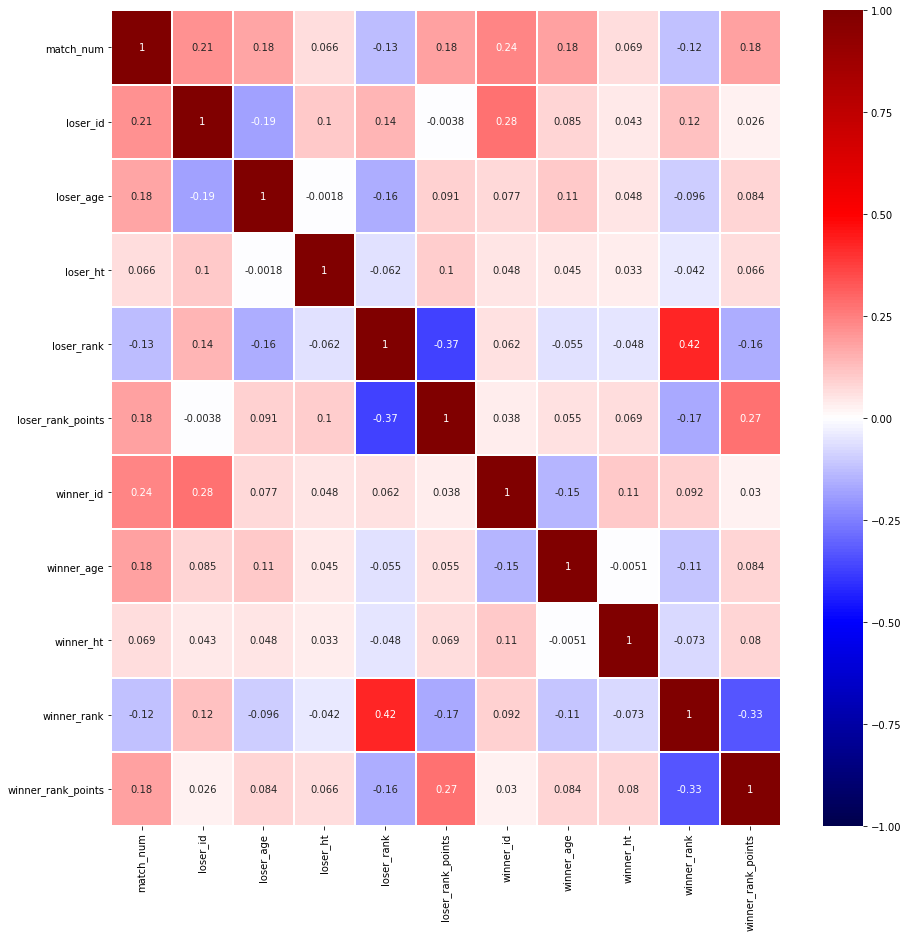

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(data3.corr(), annot= True,vmin=-1., vmax=1., linewidth=0.1, cmap= 'seismic')

In [30]:
# Check for the missing values
nbdata3=len(data3)
print((1-(data3.isna().sum())/nbdata3)*100)

match_num             100.000000
surface                99.786700
tourney_level         100.000000
round                 100.000000
loser_id              100.000000
loser_hand             98.129854
loser_ioc             100.000000
loser_age              99.787777
loser_ht               90.590022
loser_rank             97.598759
loser_rank_points      96.606591
winner_id             100.000000
winner_hand            99.203895
winner_ioc            100.000000
winner_age             99.906277
winner_ht              94.343241
winner_rank            98.900104
winner_rank_points     97.898241
dtype: float64


In [31]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92827 entries, 76863 to 169689
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_num           92827 non-null  int64  
 1   surface             92629 non-null  object 
 2   tourney_level       92827 non-null  object 
 3   round               92827 non-null  object 
 4   loser_id            92827 non-null  int64  
 5   loser_hand          91091 non-null  object 
 6   loser_ioc           92827 non-null  object 
 7   loser_age           92630 non-null  float64
 8   loser_ht            84092 non-null  float64
 9   loser_rank          90598 non-null  float64
 10  loser_rank_points   89677 non-null  float64
 11  winner_id           92827 non-null  int64  
 12  winner_hand         92088 non-null  object 
 13  winner_ioc          92827 non-null  object 
 14  winner_age          92740 non-null  float64
 15  winner_ht           87576 non-null  float64
 16 

In order to overcome the problem of missing data, we will use replacement. We will use the mean of numerical values and the mode for categorial variables. 

In [32]:
#Basic statistics for the data using describe method
perc =[.25, .50, .75] 
include =['object', 'float', 'int'] 
data3.describe(percentiles = perc, include = include)

,match_num,surface,tourney_level,round,loser_id,loser_hand,loser_ioc,loser_age,loser_ht,loser_rank,loser_rank_points,winner_id,winner_hand,winner_ioc,winner_age,winner_ht,winner_rank,winner_rank_points
count,92827.000000,92629,92827,92827,92827.000000,91091,92827,92630.000000,84092.000000,90598.000000,89677.000000,92827.000000,92088,92827,92740.000000,87576.000000,91806.000000,90876.000000
unique,NaN,4,5,9,NaN,2,127,NaN,NaN,NaN,NaN,NaN,2,120,NaN,NaN,NaN,NaN
top,NaN,Hard,A,R32,NaN,R,ESP,NaN,NaN,NaN,NaN,NaN,R,ESP,NaN,NaN,NaN,NaN
freq,NaN,45322,53688,30469,NaN,77810,9526,NaN,NaN,NaN,NaN,NaN,79139,11036,NaN,NaN,NaN,NaN
mean,48.468280,NaN,NaN,NaN,103779.105616,NaN,NaN,25.762806,184.920849,120.948619,854.270761,103586.131039,NaN,NaN,25.681387,185.386932,81.871501,1367.209483
std,77.098541,NaN,NaN,NaN,5259.174168,NaN,NaN,3.800559,6.606036,182.255638,951.104618,4212.753420,NaN,NaN,3.666957,6.675278,136.983170,1693.206659
min,1.000000,NaN,NaN,NaN,100282.000000,NaN,NaN,14.530000,160.000000,1.000000,1.000000,100284.000000,NaN,NaN,14.360000,160.000000,1.000000,1.000000
25%,8.000000,NaN,NaN,NaN,102021.000000,NaN,NaN,22.990000,180.000000,37.000000,379.000000,101991.000000,NaN,NaN,22.960000,180.000000,18.000000,511.000000
50%,21.000000,NaN,NaN,NaN,103206.000000,NaN,NaN,25.590000,185.000000,71.000000,630.000000,103264.000000,NaN,NaN,25.460000,185.000000,46.000000,851.000000
75%,43.000000,NaN,NaN,NaN,104471.000000,NaN,NaN,28.330000,188.000000,120.000000,1000.000000,104468.000000,NaN,NaN,28.140000,190.000000,90.000000,1538.000000


In [33]:
# Filling nan values
values_na={'surface': 'Hard', 'loser_hand': 'R', 'loser_age': 25.7, 
           'loser_ht': 184.9 ,'loser_rank':121., 'loser_rank_points':854.27,
           'winner_hand': 'R' ,'winner_age': 25.6, 'winner_ht': 185.39,
           'winner_rank':81.87, 'winner_rank_points':1367.2}
data3.fillna(value=values_na, inplace=True)

Another approach is to drop the lines where there are missing values. We can also use a mixed strategy where we use replacement for some features and drop for other ones depending on the importance of the feature on the prediction.

In [34]:
#data3.dropna(inplace=True)
#print(len(data3))
#nbdata3=len(data3)
#print((1-(data3.isnull().sum())/nbdata3)*100)

In [35]:
# Checking for duplicate rows
print(len(data3))
data3.drop_duplicates() 
print(len(data3))

92827
92827


In [36]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92827 entries, 76863 to 169689
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_num           92827 non-null  int64  
 1   surface             92827 non-null  object 
 2   tourney_level       92827 non-null  object 
 3   round               92827 non-null  object 
 4   loser_id            92827 non-null  int64  
 5   loser_hand          92827 non-null  object 
 6   loser_ioc           92827 non-null  object 
 7   loser_age           92827 non-null  float64
 8   loser_ht            92827 non-null  float64
 9   loser_rank          92827 non-null  float64
 10  loser_rank_points   92827 non-null  float64
 11  winner_id           92827 non-null  int64  
 12  winner_hand         92827 non-null  object 
 13  winner_ioc          92827 non-null  object 
 14  winner_age          92827 non-null  float64
 15  winner_ht           92827 non-null  float64
 16 

There are no duplicates. In the next step, we will convert the features of type object to categorial. 

In [37]:
#Converting categorial features from object to category type
data3['winner_hand']= data3['winner_hand'].astype('category')
data3['winner_ioc'] = data3['winner_ioc'].astype('category')

data3['loser_hand']=data3['loser_hand'].astype('category')
data3['loser_ioc'] = data3['loser_ioc'].astype('category')

data3['surface'] = data3['surface'].astype('category')
data3['tourney_level'] = data3['tourney_level'].astype('category')


In [38]:
data3['round'] = data3['round'].astype('category')

In the following step, we will procede by doing one-hot encoding the categorial variables

In [39]:
#categorical attributes
cat_attributes=['surface','round','tourney_level']
#To get dummy variables to encode the categorical features to numeric
data_encoded=pd.get_dummies(data3,columns=cat_attributes)

In [40]:
data_encoded.head(5)

,match_num,loser_id,loser_hand,loser_ioc,loser_age,loser_ht,loser_rank,loser_rank_points,winner_id,winner_hand,...,round_R16,round_R32,round_R64,round_RR,round_SF,tourney_level_A,tourney_level_D,tourney_level_F,tourney_level_G,tourney_level_M
76863,1,101746,R,ITA,20.64,175.0,78.0,459.0,101142,R,...,0,1,0,0,0,1,0,0,0,0
76864,2,100587,R,NZL,31.82,188.0,220.0,114.0,101613,R,...,0,1,0,0,0,1,0,0,0,0
76865,3,101601,R,NZL,21.70,185.0,212.0,116.0,101179,R,...,0,1,0,0,0,1,0,0,0,0
76866,4,101332,L,ISR,23.85,173.0,72.0,483.0,101117,R,...,0,1,0,0,0,1,0,0,0,0
76867,5,101735,R,AUS,20.70,196.0,28.0,876.0,101901,R,...,0,1,0,0,0,1,0,0,0,0


In order to be able to build a supervised prediction model we need to define our target feature. For this purpose, we will transform our data features from loser and winner-related to just two players that we will designate randomly by either number 1 or 2 (first player & second player) with their respective personal informations (id, hand, age...) and general informations about the match and the tourney (surface, round, tournement level...). In order to create our label or target feature we will divide randomly our dataset in 2 equal datasets in which if the player 1 is the winner we will assign to the label the value 1 else (the player 2 is the winner) 0. To do so, in the first half of the dataset, the winner is considered as first player so label=1. In the second half,we create a mirror effect by inversing the places of the players so that the second player is the winner and label=0.

In [41]:
#Diving our dataset into 2 equal sets
from sklearn.model_selection import train_test_split
data_1_2, data_2_1 = train_test_split( data_encoded, test_size = 0.50, random_state=42)

# Case where the the first player is the winner
data_1_2.rename(columns={'winner_id':'id_1','winner_hand':'hand_1', 'winner_ioc':'ioc_1', 'winner_age':'age_1', 
                         'winner_ht':'ht_1','winner_rank':'rank_1','winner_rank_points':'rank_points_1',
                         'loser_id':'id_2','loser_hand':'hand_2', 'loser_ioc':'ioc_2', 'loser_age':'age_2', 
                         'loser_ht':'ht_2', 'loser_rank':'rank_2','loser_rank_points':'rank_points_2'},inplace=True)

#The winner is the player number 1 therefore outcome=1
data_1_2['outcome']=1.0

#Case where the second player is the winner
data_2_1.rename(columns={'winner_id':'id_2','winner_hand':'hand_2', 'winner_ioc':'ioc_2', 'winner_age':'age_2', 
                         'winner_ht':'ht_2','winner_rank':'rank_2','winner_rank_points':'rank_points_2',
                         'loser_id':'id_1','loser_hand':'hand_1', 'loser_ioc':'ioc_1', 'loser_age':'age_1', 
                         'loser_ht':'ht_1', 'loser_rank':'rank_1','loser_rank_points':'rank_points_1'},inplace=True)

data_2_1["outcome"]=0.0


In [42]:
#Concatenation of the two datasets
X= pd.concat([data_1_2,data_2_1])
X= X.sample(frac=1).reset_index(drop=True)

In [43]:
len(X['ioc_1'].unique())

125

Note that there still are two variables that are categorial: the player hand and the player's country. Since the player's country have 125 possibility it is not convenient to hot-encode this feature. Thus, we will only hot-encode the player's hand and we will use simly a label encoder (giving values between 0 and n_classes-1) for the country feature.

In [44]:
from sklearn.preprocessing import LabelEncoder
#Label encoding for player's country
X['ioc_1'] = LabelEncoder().fit_transform(X['ioc_1'])
X['ioc_2'] = LabelEncoder().fit_transform(X['ioc_2'])

In [45]:
X['ioc_1'].unique()

array([103,  43, 117,  56,   3,  41,  40,  85,  26,   5, 105,  36,  71,
        86, 115, 104,  29,   6,  70,  95,  10,  31,  87,  39,  62, 107,
        79,  94,  55, 110, 112,  93,  18,  59, 120,  30,  33,  73,  81,
       101,   7,  20,  82,  13,  17,  89, 109, 124,  68,  28,  15,  90,
        50,  53,  99,  60,  52,  84, 118,  21,  12,  49, 116,  66,  42,
        51,  67,  45,  75,   4,  35,  24,  48,   1,  34,  44,  78,  57,
        65,  72, 113,  91,  61,  16,  64,   8,   0,  98,  63, 106,  22,
        46,  25, 114,  37,  11,  54,  14,  80,  83, 123,  92,   9, 111,
       100,  27,  76, 102,  19,  97,  74, 122,  69,  88,  23, 121,  96,
       119,  38,  77,  32,   2,  58, 108,  47])

In [46]:
#categorical attributes
cat_attributes=['hand_1','hand_2']
#To get dummy variables to encode the categorical features to numeric
X_new=pd.get_dummies(X,columns=cat_attributes)


In [47]:
X_new.columns

Index(['match_num', 'id_2', 'ioc_2', 'age_2', 'ht_2', 'rank_2',
       'rank_points_2', 'id_1', 'ioc_1', 'age_1', 'ht_1', 'rank_1',
       'rank_points_1', 'surface_Carpet', 'surface_Clay', 'surface_Grass',
       'surface_Hard', 'round_BR', 'round_F', 'round_QF', 'round_R128',
       'round_R16', 'round_R32', 'round_R64', 'round_RR', 'round_SF',
       'tourney_level_A', 'tourney_level_D', 'tourney_level_F',
       'tourney_level_G', 'tourney_level_M', 'outcome', 'hand_1_L', 'hand_1_R',
       'hand_2_L', 'hand_2_R'],
      dtype='object')

**Some exploratory data visualization**

array([[<AxesSubplot:title={'center':'match_num'}>,
        <AxesSubplot:title={'center':'id_2'}>,
        <AxesSubplot:title={'center':'ioc_2'}>,
        <AxesSubplot:title={'center':'age_2'}>],
       [<AxesSubplot:title={'center':'ht_2'}>,
        <AxesSubplot:title={'center':'rank_2'}>,
        <AxesSubplot:title={'center':'rank_points_2'}>,
        <AxesSubplot:title={'center':'id_1'}>],
       [<AxesSubplot:title={'center':'ioc_1'}>,
        <AxesSubplot:title={'center':'age_1'}>,
        <AxesSubplot:title={'center':'ht_1'}>,
        <AxesSubplot:title={'center':'rank_1'}>],
       [<AxesSubplot:title={'center':'rank_points_1'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

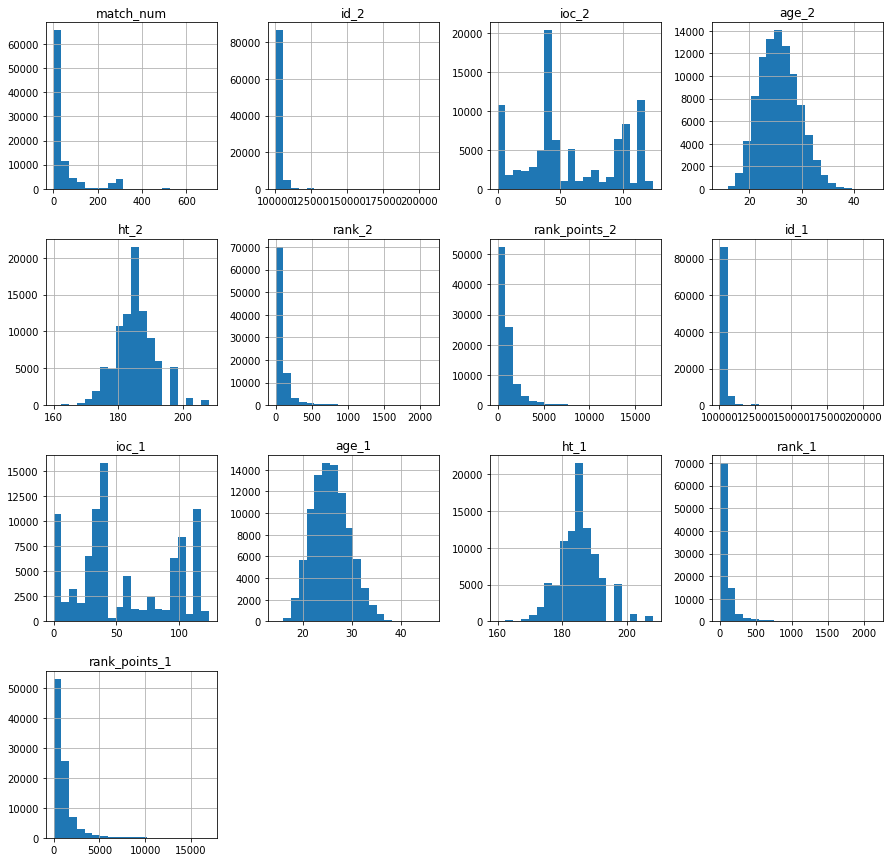

In [48]:
X_new.hist(['match_num', 'id_2', 'ioc_2', 'age_2', 'ht_2', 'rank_2',
       'rank_points_2', 'id_1', 'ioc_1', 'age_1', 'ht_1', 'rank_1',
       'rank_points_1'],bins=20, figsize=(15,15))

Finally we divide our data as an input and output for the model.

### Machine learning model building and accuracy verification

In [49]:
y=X_new['outcome']
x=X_new.drop(columns=['outcome'])

In [50]:
# split data : 80% for train and 20% for test.
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42 )
#Shape verification
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
print(Y_train.head())
print(Y_test.head())

(74261, 35) (18566, 35) (74261,) (18566,)
51140    0.0
2886     1.0
68767    0.0
60927    0.0
87307    0.0
Name: outcome, dtype: float64
23394    1.0
73460    0.0
14737    1.0
7108     0.0
19030    1.0
Name: outcome, dtype: float64


In [51]:
# Importing models
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn import model_selection

In [52]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92827 entries, 0 to 92826
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   match_num        92827 non-null  int64  
 1   id_2             92827 non-null  int64  
 2   ioc_2            92827 non-null  int64  
 3   age_2            92827 non-null  float64
 4   ht_2             92827 non-null  float64
 5   rank_2           92827 non-null  float64
 6   rank_points_2    92827 non-null  float64
 7   id_1             92827 non-null  int64  
 8   ioc_1            92827 non-null  int64  
 9   age_1            92827 non-null  float64
 10  ht_1             92827 non-null  float64
 11  rank_1           92827 non-null  float64
 12  rank_points_1    92827 non-null  float64
 13  surface_Carpet   92827 non-null  uint8  
 14  surface_Clay     92827 non-null  uint8  
 15  surface_Grass    92827 non-null  uint8  
 16  surface_Hard     92827 non-null  uint8  
 17  round_BR    

**XG Boost model**

In [53]:

XGB_model = XGBClassifier(eval_metric='logloss')
XGB_model.fit(X_train,Y_train)
Y_predXGB = XGB_model.predict(X_test)
score_train_XGB = XGB_model.score(X_train,Y_train)
print("XGBoost score on training set: ", score_train_XGB)
score_test_XGB = XGB_model.score(X_test,Y_test)
print("XGBoost score on test set: ", score_test_XGB)
print("XG Boost")
print(confusion_matrix(Y_test, Y_predXGB))
print(classification_report(Y_test,Y_predXGB))
print(accuracy_score(Y_test, Y_predXGB))

#Cross validation prediction
scores_XGB=model_selection.cross_val_score(XGB_model,x,y,cv=10,scoring='accuracy')
print('Coss validation average score:', scores_XGB.mean())

XGBoost score on training set:  0.7651391713012213
XGBoost score on test set:  0.694710761607239
XG Boost
[[6386 2888]
 [2780 6512]]
              precision    recall  f1-score   support

         0.0       0.70      0.69      0.69      9274
         1.0       0.69      0.70      0.70      9292

    accuracy                           0.69     18566
   macro avg       0.69      0.69      0.69     18566
weighted avg       0.69      0.69      0.69     18566

0.694710761607239
Coss validation average score: 0.6955087730366387


**K-Nearst Neighbors**

In [54]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)
Y_predKNN = KNN_model.predict(X_test)
score_train_KNN = KNN_model.score(X_train,Y_train)
print("KNN score on training set: ", score_train_KNN)
score_test_KNN = KNN_model.score(X_test,Y_test)
print("KNN score on test set: ", score_test_KNN)
print("KNN Boost")
print(confusion_matrix(Y_test, Y_predKNN))
print(classification_report(Y_test,Y_predKNN))
print(accuracy_score(Y_test, Y_predKNN))

#Cross validation prediction
scores_KNN=model_selection.cross_val_score(KNN_model,x,y,cv=10,scoring='accuracy')
print('Coss validation average score:', scores_KNN.mean())

KNN score on training set:  0.7450478716957757
KNN score on test set:  0.6106862005817085
KNN Boost
[[5605 3669]
 [3559 5733]]
              precision    recall  f1-score   support

         0.0       0.61      0.60      0.61      9274
         1.0       0.61      0.62      0.61      9292

    accuracy                           0.61     18566
   macro avg       0.61      0.61      0.61     18566
weighted avg       0.61      0.61      0.61     18566

0.6106862005817085
Coss validation average score: 0.6166740548339422


**Decision tree**

In [55]:
#Decision Tree model
DT_model = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,splitter='best')

DT_model.fit(X_train,Y_train)
Y_predDT = DT_model.predict(X_test)
score_train_DT = DT_model.score(X_train,Y_train)
print("Decision Tree score on training set: ", score_train_DT)
score_test_DT = DT_model.score(X_test,Y_test)
print("Decision Tree score on test set: ", score_test_DT)
print("Decision Tree")
print(confusion_matrix(Y_test, Y_predDT))
print(classification_report(Y_test,Y_predDT))
print(accuracy_score(Y_test, Y_predDT))

#Cross validation prediction
scores_DT=model_selection.cross_val_score(DT_model,x,y,cv=10,scoring='accuracy')
print('Coss validation average score:', scores_DT.mean())

Decision Tree score on training set:  0.6507049460685959
Decision Tree score on test set:  0.6444037487881072
Decision Tree
[[6816 2458]
 [4144 5148]]
              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67      9274
         1.0       0.68      0.55      0.61      9292

    accuracy                           0.64     18566
   macro avg       0.65      0.64      0.64     18566
weighted avg       0.65      0.64      0.64     18566

0.6444037487881072
Coss validation average score: 0.6522670671364363


**Random forest**

In [56]:
RandomForest_model = RandomForestClassifier(n_estimators=15)
RandomForest_model.fit(X_train,Y_train)
Y_predRF = RandomForest_model.predict(X_test)
score_train_RF = RandomForest_model.score(X_train,Y_train)
print("Random Forest score on training set: ", score_train_RF)
score_test_RF = RandomForest_model.score(X_test,Y_test)
print("Random Forest score on test set: ", score_test_RF)
print("Random Forest")
print(confusion_matrix(Y_test, Y_predRF))
print(classification_report(Y_test,Y_predRF))
print(accuracy_score(Y_test, Y_predRF))

#Cross validation prediction
scores_RF=model_selection.cross_val_score(RandomForest_model,x,y,cv=10,scoring='accuracy')
print('Coss validation average score:', scores_RF.mean())

Random Forest score on training set:  0.9956774080607587
Random Forest score on test set:  0.664494236776904
Random Forest
[[6136 3138]
 [3091 6201]]
              precision    recall  f1-score   support

         0.0       0.67      0.66      0.66      9274
         1.0       0.66      0.67      0.67      9292

    accuracy                           0.66     18566
   macro avg       0.66      0.66      0.66     18566
weighted avg       0.66      0.66      0.66     18566

0.664494236776904
Coss validation average score: 0.6707855072522302


**ADA Boost**

In [57]:
Adaboost_model = AdaBoostClassifier()
Adaboost_model.fit(X_train,Y_train)
Y_predAD = Adaboost_model.predict(X_test)
score_train_AD = Adaboost_model.score(X_train,Y_train)
print("Adaboost score on training set: ", score_train_AD)
score_test_AD = Adaboost_model.score(X_test,Y_test)
print("Adaboost score on test set: ", score_test_AD)
print("Adaboost")
print(confusion_matrix(Y_test, Y_predAD))
print(classification_report(Y_test,Y_predAD))
print(accuracy_score(Y_test, Y_predAD))

#Cross validation prediction
scores_AD=model_selection.cross_val_score(Adaboost_model,x,y,cv=10,scoring='accuracy')
print('Coss validation average score:', scores_AD.mean())

Adaboost score on training set:  0.6756709443718776
Adaboost score on test set:  0.6701497360766994
Adaboost
[[6404 2870]
 [3254 6038]]
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.68      9274
         1.0       0.68      0.65      0.66      9292

    accuracy                           0.67     18566
   macro avg       0.67      0.67      0.67     18566
weighted avg       0.67      0.67      0.67     18566

0.6701497360766994
Coss validation average score: 0.6752884803106272


In [58]:
models=[]
scores=[]
models.append("Decision Tree")
scores.append(scores_DT.mean())
models.append("Random Forest")
scores.append(scores_RF.mean())
models.append("K-Nearst Neighbors")
scores.append(scores_KNN.mean())
models.append("XG Boost")
scores.append(scores_XGB.mean())
models.append("AdaBoost")
scores.append(scores_AD.mean())

In [59]:
def horizontal_barplot(values,labels,xaxis_label,title,xlim=None,figsize=None):
    
    cs=["red","blue","green","orange","gold","firebrick"]
    cs=cs*(len(values)//len(cs)+1)
    # The figure
    if figsize==None:
        fig=plt.figure(figsize=(4,3))
    else:
        fig=plt.figure(figsize=figsize,dpi=100)
    ax = fig.add_axes([0,0,1,0.9])
    color=cs[:len(values)]
    ax.barh(range(len(values)),values,color=color)
    ax.set_yticks(range(len(values)))
    ax.set_yticklabels(labels)
    if xlim!=None:
        ax.set_xlim(xlim)
    plt.suptitle(title)
    ax.set_xlabel(xaxis_label)
    plt.show()

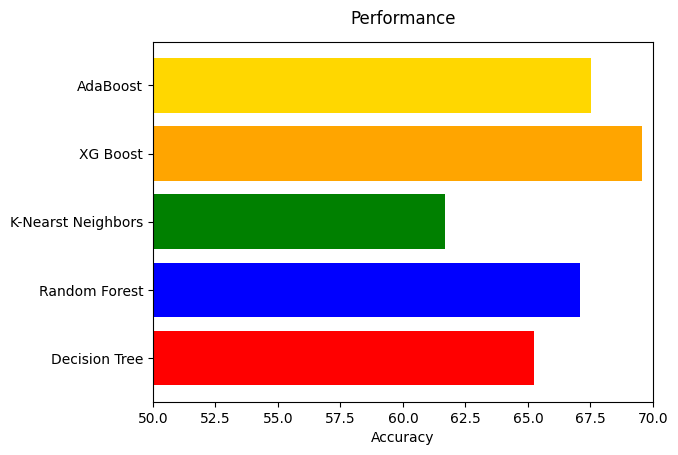

In [60]:
Scores=[x*100 for x in scores]
xaxis_label="Accuracy"
title="Performance"
xlim=[50,70]
horizontal_barplot(Scores,models,xaxis_label,title,xlim,figsize=(5,4))

### Conclusion

From the above barplot based on the results of the cross validation, we can see that the poorest performance is that of the KNN model. It is also the slowest one. The Best score is given by the XG boost. Despite being all tree-based ensemble models, the XG boost has a better performance than Ada boost and random forest. The three of them perform better than their weak learner (the decision tree). In fact, decision trees will be less accurate due to their high variance/overfitting compared with boosting and bagging algorithms. From the previous analysis, the Ada boost and the XG boost based on boosting, lead to less over-fitting than the random forest, that is based on bagging. Random forests combine results at the end of the process by averaging (regression) or voting majority rule (classification) while gradient boosting combines is an additive model. The latter introduces a weak learner to improve the shortcomings of previous weak learners.
The XG boost seems to be better suited for noisy data in general which explains why it outperforms Ada boost. It also gives the results more rapidly. 

In conclusion, for the match result prediction we adopt the choice of the XG boost model. 



### Prespectives and further enhancement 


With more time, possible directions for better results include:

- Make more feature engineering, feature selection and data cleaning. For eaxmple try to simple drow therows with missing values instead of filling them with the means/modes. We can also use data standarization for numerical attributes.
- Fine tunning the hyper-parameters of the classifiers. Try other prediction models such as neural network (deep learning).
- Making predictions in real-time of the match and include more informations about the situation so far. For example, include the number of minutes spent so far, the number of serve, the double faults...
- Try to take into account the historical record of each player. Currently, rank and rank points are the only variables that reflect this and are taken into account. Since the rest of the performance-related features ('l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_ace','l_bpFaced', 'l_bpSaved', 'l_df', 'l_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms', 'w_ace','w_bpFaced', 'w_bpSaved', 'w_df', 'w_svpt') in this dataset were only related to a specific game and not to the history of the player, they were not exploitable for the prediction. In order to be able to use them, we should create averaged quantities over the past matches for each player.  
- Another search direction is to make our target variable the score instead of the who is winning. I started to work in this direction as well but I did not find a better performance for the moment. With more time spent on fine tunning the models, this can be a promising direction of work. 

Finally the time spent on this work is approximately between 5 and hours with almost 40% spent on feature engineering, 30% on modeling and the rest on conclusion and comments of this work.